In order to successfully complete this assignment you need to:
1. Participate both individually and in groups during class.
2. Submit this notebook to the `exercise` folder in your `cmse802-yourlastname` repository by 10pm __the SAME DAY of the class__. Late assignment will receive <=80% of the grade.

### <p style="text-align: left;"> &#9989; Saima Alam </p>

# __Convolutional Neural Network: In-Class__

<img src= "https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Convolutional_Layers_of_a_Convolutional_Neural_Network.svg/1024px-Convolutional_Layers_of_a_Convolutional_Neural_Network.svg.png" width="50%">

From: [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Convolutional_Layers_of_a_Convolutional_Neural_Network.svg)

This assignment is modified from the [TensorFlow documentation](https://www.tensorflow.org/tutorials/images/cnn).

## Learning objectives

At the end of the exercise, you should be able to:
- Build a CNN and use it for classification tasks.
- Explain how input and output sizes are related in different layers.
- Explain the numbers of parameters in different layers.
- Optimize model through hyperparameter tuning and model selection.

## Outline

1. [Review pre-class assignment](#preclass)
1. [CIFAR10 dataset](#cifar10)
1. [ANN revisited](#ann)
1. [Building a CNN](#cnn)
1. [Friendly competition](#compete)

----
<a name="preclass"></a>

# 1. Pre-Class Assignment Review

In your group, discussion the following.

&#9989; <font color=red>**QUESTION:**</font> Did you get stuck doing pre-class exercise or find some ideas confusing? If so where did you get stuck? What did you find confusing? What solutions did your groupmates suggest?

<font size=+3>&#9998;</font> Replace with your answer to the above question!

No problems in our group with the pre-class

In [7]:
#Load necessary libraries

import numpy as np
import torchvision.datasets as datasets
from torchvision import transforms
import torch


----
<a name="dense"></a>

# 2. CIFAR10 dataset

The [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html):
- The images are in 10 classes With 6,000 images in each class. 
- There are 50,000 training images and 10,000 testing images.
- The classes are mutually exclusive.

&#9989; **<font color=blue>DO THIS:</font>** Let's download the dateaset. The dataset is too large to train quickly. Thus, we will use the original 10,000 testing instances as training. And original training as testing.

In [8]:
cifar_train_data  =  datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
cifar_test_data  =  datasets.CIFAR10(root='./data', train=False, download=True, transform=None)

X_train_full = cifar_train_data.data/255
y_train_full = cifar_train_data.targets
X_test = torch.tensor(cifar_test_data.data/255).float()
y_test = torch.tensor(cifar_test_data.targets).long()



Files already downloaded and verified
Files already downloaded and verified


&#9989; **<font color=blue>DO THIS:</font>** Check out the 1st 24 images.

In [9]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" 

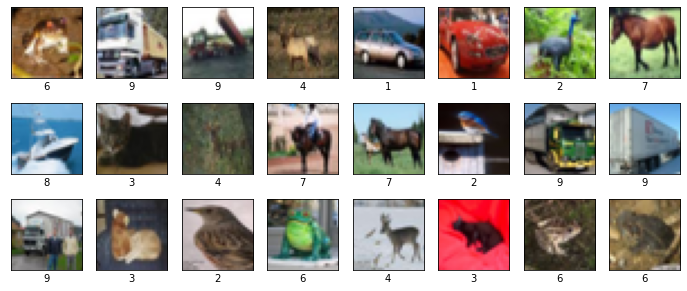

In [10]:

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
for i in range(24):
    plt.subplot(3,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_full[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(y_train_full[i])
plt.show()

&#9989; **<font color=blue>DO THIS:</font>** Write code that will print out the following:
- Dimensionality of `X_train_full`, `y_train_full`, `X_test`, `y_test`.
- Dimensionality of the 1st training image.

In [11]:
# put your code here
print(np.unique(y_train_full))
X_train_full.shape

#Dimensionality of X_train_full and y_train_full
print("Dimensionality of X_train_full",np.shape(X_train_full))
print("Dimensionality of y_train_full",np.shape(y_train_full))
print("Dimensionality of X_test",np.shape(X_test))
print("Dimensionality of y_test",np.shape(y_test))

#Dimensionality of the first training image
print("Dimensionality of first training image",np.shape(X_train_full[0]))

[0 1 2 3 4 5 6 7 8 9]
Dimensionality of X_train_full (50000, 32, 32, 3)
Dimensionality of y_train_full (50000,)
Dimensionality of X_test torch.Size([10000, 32, 32, 3])
Dimensionality of y_test torch.Size([10000])
Dimensionality of first training image (32, 32, 3)


&#9989; <font color=red>**QUESTION:**</font> Discuss with your neighbor: why is the dimension of the first image (32, 32, 3)?

<font size=+3>&#9998;</font> Replace with your answer to the above question!

The whole training data array is essentially an array of 5000 images each having a pixel size of 32x32x3. When I call the first image from that it shows the pixel size 32x32x3

&#9989; **<font color=blue>DO THIS:</font>** Next write code to do the following:
- Split training data into train (50%) and validation (50%) subsets with `train_test_split` and set the `stratify` parameter as `y_train_full`.
- Call the objects returned by `train_test_split` as `X_train`, `X_valid`, `y_train`, `y_valid`.
- Print the unique values in `y_train` which is a Numpy array and print out the count of each unique value.

In [12]:
from sklearn.model_selection import train_test_split
random_state = 42

# write your code below
X_train,X_valid, y_train,y_valid= train_test_split(X_train_full, y_train_full,test_size=0.2,stratify=y_train_full,random_state=42)
print("Unique values in y_train",np.unique(y_train))


Unique values in y_train [0 1 2 3 4 5 6 7 8 9]


In [13]:
#print("Unique values in y_train",y_train.unique(return counts=True))

In [14]:
X_train = torch.tensor(X_train).float()
X_valid = torch.tensor(X_valid).float()
y_train = torch.tensor(y_train).long()
y_valid = torch.tensor(y_valid).long()

----
<a name="ann"></a>

# 3. ANN model revisted

Before we create a CNN model to classify CIFAR10 datasets into 10 classes, let's see how well the ANN we have been working on may classify this dataset.



&#9989; **<font color=blue>DO THIS:</font>** Run the code below to create the ANN model

In [33]:
import torch.nn as nn
import torch.nn.functional as F
class Classifier_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32**2*3,300)
        self.fc2 = nn.Linear(300,100)
        self.fc3 = nn.Linear(100,10)
        self.dropout = nn.Dropout(0.5)
    
        
    def forward(self,x):
        type(x)
        x = x.contiguous().view(x.shape[0],-1)
        type(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(x,dim=1)
        return x
    

&#9989; <font color=red>**QUESTION:**</font> Fill in the blanks. The ANN model generated from the above function will have:
- 3 linear layers each with  300,100 and 10 nodes, respectively
- Use relu as activation functions
- 0 Batch Normalization layers
- 1 Dropout layers with dropout rate of 0.5
- Use  SGD as the optimizer with learning rate of 0.1. 

&#9989; **<font color=blue>DO THIS:</font>**  Run the following cell to train and validate the model.

In [34]:
net = Classifier_NN()    
import torch.optim as optim
criterion = torch.nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
epoch = 50
batch_size = 2000
n_batch = int(25000/batch_size)
net.train()
for e in range(epoch):
    running_loss = 0
    for i in range(n_batch):
       optimizer.zero_grad()
       pred = net(X_train[i*batch_size:(i+1)*batch_size])
       loss = criterion(pred,y_train[i*batch_size:(i+1)*batch_size])
       val_loss = criterion(net(X_valid),y_valid)
       loss.backward()
       optimizer.step()
       running_loss += loss.item()
    print('Epoch: {} \t Training loss: {:.6f} \t Validation loss: {:.6f}'.format(e,running_loss, val_loss))

Epoch: 0 	 Training loss: 27.415570 	 Validation loss: 2.254001
Epoch: 1 	 Training loss: 25.827448 	 Validation loss: 2.064252
Epoch: 2 	 Training loss: 24.535632 	 Validation loss: 1.970222
Epoch: 3 	 Training loss: 23.348557 	 Validation loss: 1.929544
Epoch: 4 	 Training loss: 22.736212 	 Validation loss: 1.891446
Epoch: 5 	 Training loss: 22.337840 	 Validation loss: 1.852653
Epoch: 6 	 Training loss: 21.915883 	 Validation loss: 1.817148
Epoch: 7 	 Training loss: 21.523353 	 Validation loss: 1.794653
Epoch: 8 	 Training loss: 21.326614 	 Validation loss: 1.794953
Epoch: 9 	 Training loss: 21.234361 	 Validation loss: 1.778740
Epoch: 10 	 Training loss: 21.260497 	 Validation loss: 1.793716
Epoch: 11 	 Training loss: 21.091960 	 Validation loss: 1.762366
Epoch: 12 	 Training loss: 20.944065 	 Validation loss: 1.758802
Epoch: 13 	 Training loss: 20.808634 	 Validation loss: 1.754368
Epoch: 14 	 Training loss: 20.685143 	 Validation loss: 1.734206
Epoch: 15 	 Training loss: 20.79352

In [35]:
def model_evaluate(net, X_test,y_test):
      pred_prob = net(X_test.float())
      corrects = 0
      for i in range(len(pred_prob)):
            pred_label = pred_prob[i].argmax()
            if pred_label == y_test[i]:
                corrects += 1
      return corrects/len(pred_prob)

print(f'test accuracy {model_evaluate(net,X_test,y_test)}')

test accuracy 0.3953


&#9989; <font color=red>**QUESTION:**</font> Discuss with your neighbor: how do you think this model is doing?

<font size=+3>&#9998;</font> Replace with your answer to the above question!

The test accuracy is very low at 39%. There needs to be some improvement in the modeling method.

----
<a name="cnn"></a>

# 4. CNN model



## 4.1 Create the convolutional base model

&#9989; **<font color=blue>DO THIS:</font>**  Below is the function to create a base 5-layer mixed model with 
-  2 convolutional layers  (each layer contains kernel and pooling)
-  2 linear Layer
-  after each layer a ReLU activation is used
- . Comment on the lines as indicated. As input, a 


Make sure you understand the code line by line.

In [15]:
#Import necessary libraries
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten


In [26]:
class CNN_classifier(Module):
    def __init__(self, numChannels, classes):
        # call the parent constructor
        super().__init__()
        # initialize first set of CONV => RELU => POOL layers
        self.conv1 = Conv2d(in_channels=numChannels, out_channels=10,
             kernel_size=(5, 5))
        self.relu1 = ReLU()
        self.maxpool1 = MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        # initialize second set of CONV => RELU => POOL layers
        self.conv2 = Conv2d(in_channels=10, out_channels=20,
             kernel_size=(5, 5))
        self.relu2 = ReLU()
        self.maxpool2 = MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        # initialize first (and only) set of FC => RELU layers
        self.fc1 = Linear(in_features=500, out_features=50)
        self.relu3 = ReLU()
        # initialize our softmax classifier
        self.fc2 = Linear(in_features=50, out_features=classes)
        self.logSoftmax = LogSoftmax(dim=1)
    def forward(self, x):
        # pass the input through our first set of CONV => RELU =>
        # POOL layers
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        # pass the output from the previous layer through the second
        # set of CONV => RELU => POOL layers
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        # flatten the output from the previous layer and pass it
        # through our only set of FC => RELU layers
        x = flatten(x, 1)
        x = self.fc1(x)
        x = self.relu3(x)
        # pass the output to our softmax classifier to get our output
        # predictions
        x = self.fc2(x)
        output = self.logSoftmax(x)
        # return the output predictions
        return output
    

&#9989; **<font color=blue>DO THIS:</font>** The input that CNN takes is of slightly different format as ANN. In particular, 
- we need to permute `X_train` to be of dimension (N, 3, 32, 32), where N is the number of training samples in each batch, 3 is the 3 color channels (R,G,B), 32 x 32 is the size of each image

Run the following code to perform the permutation

In [27]:
X_train_cnn  = torch.permute(X_train.clone(),(0,3,1,2))
X_valid_cnn  = torch.permute(X_valid.clone(),(0,3,1,2))
X_test_cnn  = torch.permute(X_test.clone(),(0,3,1,2))


## 4.2 Training the convolutional model

The training and test procedure of the CNN model (and all other models) is exactly the same as the ANN model. 

&#9989; **<font color=blue>DO THIS:</font>** The following training code contains an error. See if you can catch it.

In [28]:
net = CNN_classifier(3,10) 
import torch.optim as optim
criterion = torch.nn.NLLLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
epoch = 50
batch_size = 200
n_batch = int(25000/batch_size)
net.train()
for e in range(epoch):
    #optimizer.zero_grad()
    running_loss = 0
    for i in range(1,n_batch):
       optimizer.zero_grad()
       pred = net(X_train_cnn[i*batch_size:(i+1)*batch_size])
       loss = criterion(pred,y_train[i*batch_size:(i+1)*batch_size])
       val_loss = criterion(net(X_valid_cnn[:batch_size]),y_valid[:batch_size])
       loss.backward()
       optimizer.step()
       running_loss += loss.item()
    print('Epoch: {} \t Training loss: {:.6f} \t Validation loss: {:.6f}'.format(e,running_loss, val_loss))

Epoch: 0 	 Training loss: 250.541380 	 Validation loss: 1.869368
Epoch: 1 	 Training loss: 219.312905 	 Validation loss: 1.634644
Epoch: 2 	 Training loss: 203.154136 	 Validation loss: 1.519236
Epoch: 3 	 Training loss: 194.020097 	 Validation loss: 1.475800
Epoch: 4 	 Training loss: 186.450496 	 Validation loss: 1.423795
Epoch: 5 	 Training loss: 180.832275 	 Validation loss: 1.380160
Epoch: 6 	 Training loss: 176.252115 	 Validation loss: 1.335078
Epoch: 7 	 Training loss: 172.061566 	 Validation loss: 1.291167
Epoch: 8 	 Training loss: 168.276292 	 Validation loss: 1.253186
Epoch: 9 	 Training loss: 164.952538 	 Validation loss: 1.234618
Epoch: 10 	 Training loss: 161.424343 	 Validation loss: 1.221941
Epoch: 11 	 Training loss: 158.606127 	 Validation loss: 1.211134
Epoch: 12 	 Training loss: 156.048980 	 Validation loss: 1.192968
Epoch: 13 	 Training loss: 153.798688 	 Validation loss: 1.179728
Epoch: 14 	 Training loss: 151.701864 	 Validation loss: 1.169661
Epoch: 15 	 Training

&#9989; <font color=red>**QUESTION:**</font> What was the error in the code and how did you correct it?

<font size=+3>&#9998;</font> Put your answer to the above question here

The optimizer for the convolution was mot being updated in the batch loop and hence the training loss was not improving in the next iterations,after taking it out of the epoch loop and placing in the batch loop it worked.

&#9989; <font color=red>**QUESTION:**</font> Compare the model performance, time taken, and the history graphs, how do the CNN model differ from the ANN model we ran earlier?

In [31]:
#put your code here

model_evaluate(net, X_test_cnn,y_test)

0.6019

With same number of epochs the ANN model had an accuracy of 40% while the CNN model is showing accuracy of 60%.

But in terms of computational speed the ANN was much faster, which makes sense as it is a simpler model.The CNN case both training loss and validation loss kept reducing significantly in every epoch/iteration, it reduced in the ANN case too but the staring values were higher in CNN and reduced faster compared to ANN.

## 4.3 Model architecture

&#9989; **<font color=blue>DO THIS:</font>**  Let's examine our CNN model in more detail. First let us print out a model summary

In [32]:
from torchsummary import summary
summary(net,(3,32,32), batch_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [200, 10, 28, 28]             760
              ReLU-2          [200, 10, 28, 28]               0
         MaxPool2d-3          [200, 10, 14, 14]               0
            Conv2d-4          [200, 20, 10, 10]           5,020
              ReLU-5          [200, 20, 10, 10]               0
         MaxPool2d-6            [200, 20, 5, 5]               0
            Linear-7                  [200, 50]          25,050
              ReLU-8                  [200, 50]               0
            Linear-9                  [200, 10]             510
       LogSoftmax-10                  [200, 10]               0
Total params: 31,340
Trainable params: 31,340
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 2.34
Forward/backward pass size (MB): 33.97
Params size (MB): 0.12
Estimated To

&#9989; <font color=red>**QUESTION:**</font> Answer the following (check the appendix of this assignment if necessary):
- Why does the output from the 1st `Conv2D` layer have a shape of (200,10,28, 28)?
- Why is the # of parameters for the 1st `Conv2D` layer 760?
- Why does the output from the 1st `MaxPooling` layer have a shape of (200,10, 14, 14)?
- Why does the output from the 2nd `Conv2D` layer have a shape of (200,20, 10, 10)?
- Why is # of parameters for the 1st `Linear` layer 25050?

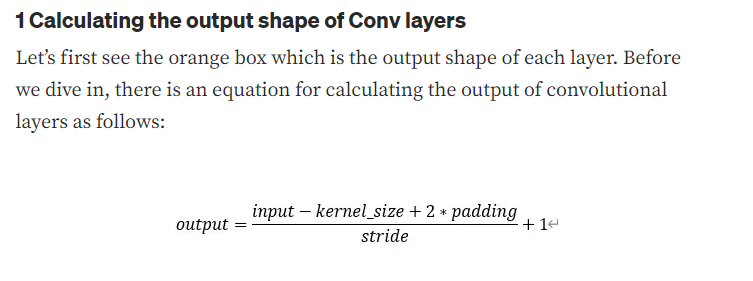

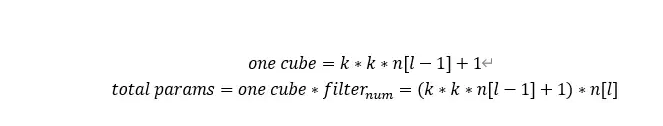

k=kernel size, n[L-1]= input channels, n[L]=number of filters


Source: https://dingyan89.medium.com/calculating-parameters-of-convolutional-and-fully-connected-layers-with-keras-186590df36c6

<font size=+3>&#9998;</font> Replace with your answer to the above question!

- The output from the first Conv2D is (200,10,28,28) because 50,000 training data is converted to a sample size of 200 data sets, the 3 input channels(R,G,B) in the image are converted to 10 channels as there are 10 filters by the first layer and the pixel size of 32X32 is converted to 28X28 as per the formula above with no strides added for kernels(5,5) giving output pixels (32-5+2*0)/1 +1 = 28 pixels
- The number of parameters in the firs Conv2D layer is 760 by using formula above for kernel (5,5) with 3 channels and 10 filters we get ((5*5*3)+1)*10 =760
- The output from the first maxpooling has shape (200,10,14,14) because the input was of shape (200,10,28,28) and the maxpooling process had default 2D strides=2 which reduced the pixel size to 28/2=14
- In the second Conv2D layer the number of output channels was chosen 20 and the pixel size reduced from 14X14 to 10X10 as per the formula in the markdown screenshot (14-5+0)/1+1= 10 pixels. In the conv layer we did not combine any strides, that is done seperately in the maxpooling layer.

- The number of parameters in the second Conv2D layer is 25050 by the same formula as before now we have kernel(5,5) with 20 filters and 10 input channels and using same method we get ((5*5*10)+1)*20= 5020 parameters. This 5020 parameters are inputs to the first linear layer which is then amplified 5 times  as per the formula number of inputs/number of outputs +1 = 500/100+1 by the linear layer to get 25020 parameters.


# 5. Another friendly competition

&#9989; <font color=blue>**DO THIS:**</font> 

- Discuss with your group member what hyperparameters as well as model architectural changes you can introduce.
  - By the way, you can also do batch normalization and dropout in CNN.
  - Also, you can put multiple `Conv2D` layers together before you do maxpooling, or you don't have to do it at all.
- Test whether you can further improve the CNN model.
- Report your best performance  [the Google sheet](https://docs.google.com/spreadsheets/d/18zfhKed3VbWuMjTXtyrwuJel0rwmJLPMtlNJFhblvhs/edit?usp=sharing) and the winner gets 5% bonus on the semester project! 



-----
### Congratulations, we're done!

---
# __APPENDIX__

## A. Conv2D and MaxPooling2D layer parameters

### [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D):
- `filters`: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
- `kernel_size`: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.
- `strides`: An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions. Specifying any stride value != 1 is incompatible with specifying any dilation_rate value != 1. Looks like __default is 1__.
- `padding`: one of "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding with zeros evenly to the left/right or up/down of the input. When padding="same" and strides=1, the output has the same size as the input. Looks like __default is valid__.
- `data_format`: A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs. channels_last corresponds to inputs with shape (batch_size, height, width, channels) while channels_first corresponds to inputs with shape (batch_size, channels, height, width). It defaults to the image_data_format value found in your Keras config file at ~/.keras/keras.json. If you never set it, then it will be channels_last.
- `dilation_rate`: an integer or tuple/list of 2 integers, specifying the dilation rate to use for dilated convolution. Can be a single integer to specify the same value for all spatial dimensions. Currently, specifying any dilation_rate value != 1 is incompatible with specifying any stride value != 1.
- `groups`: A positive integer specifying the number of groups in which the input is split along the channel axis. Each group is convolved separately with filters / groups filters. The output is the concatenation of all the groups results along the channel axis. Input channels and filters must both be divisible by groups.
- `activation`: Activation function to use. If you don't specify anything, no activation is applied (see keras.activations).
- `use_bias`: Boolean, whether the layer uses a bias vector.
- `kernel_initializer`: Initializer for the kernel weights matrix (see keras.initializers). Defaults to 'glorot_uniform'.
- `bias_initializer`: Initializer for the bias vector (see keras.initializers). Defaults to 'zeros'.
- `kernel_regularizer`: Regularizer function applied to the kernel weights matrix (see keras.regularizers).
- `bias_regularizer`: Regularizer function applied to the bias vector (see keras.regularizers).
- `activity_regularizer`: Regularizer function applied to the output of the layer (its "activation") (see keras.regularizers).
- `kernel_constraint`: Constraint function applied to the kernel matrix (see keras.constraints).
- `bias_constraint`: Constraint function applied to the bias vector (see keras.constraints). 

### [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)
- `pool_size`: integer or tuple of 2 integers, window size over which to take the maximum. (2, 2) will take the max value over a 2x2 pooling window. If only one integer is specified, the same window length will be used for both dimensions. 
- `strides`: Integer, tuple of 2 integers, or None. Strides values. Specifies how far the pooling window moves for each pooling step. If None, it will __default to pool_size__. 
- `padding`: One of "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input. Looks like __default to valid__.
- `data_format`: A string, one of channels_last (default) or channels_first. 